In [1]:
import sys

sys.path.insert(0, "..\\..\\src")
sys.path.insert(0, "..\\..\\src\\env")
sys.path.insert(0, "..\\..\\src\\walker")
sys.path.insert(0, "..\\..\\src\\model")
sys.path.insert(0, "..\\..\\src\\model\\markov\\")

In [2]:
from model.markov.markov_chain_model import MarkovChainModel
from model.markov.master_equation_integrator import MasterEquationIntegrator

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
population = 100 * np.array([10, 0, 5, 0, 0, 0])

t_1, t_2 = 0, 1
dt = 1e-4
time = np.arange(t_1, t_2 + dt, dt)

model = MarkovChainModel(node_population = population, dt = dt)

integrator = MasterEquationIntegrator()

transition_matrix = [[0, 3, 0, 0, 0, 0],\
                     [0, 0, 1, 0, 0, 0],\
                     [0, 0, 0, 5, 0, 0],\
                     [0, 0, 0, 0, 0.01, 0],\
                     [0, 0, 0, 0, 0, 1e-3],\
                     [1e-6, 0, 0, 0, 0, 0]]

transition_matrix = np.array(transition_matrix, dtype = np.float) * 5

model.add_transition_probabilities_to_nodes_(transition_matrix)

model.run(time = t_2)

ts, arr = model.get_population_time_series(nodes = [0, 1, 2, 3, 4, 5])

pred_t, pred_y = integrator(transition_matrix, population, (t_1, t_2), t_eval = time)

'[====================]       Progress: 100%'

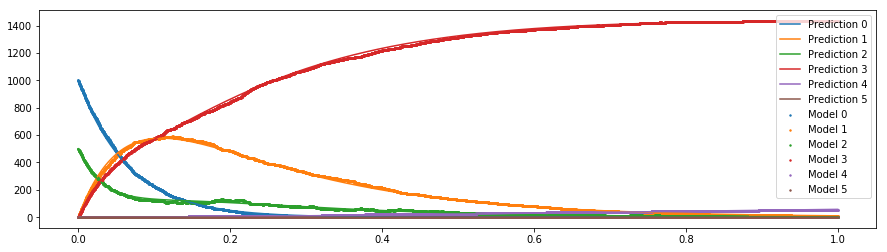

In [5]:
fig, ax = plt.subplots()

fig.set_figwidth(15)

i = 0

for ar in arr:
    ax.scatter(ts, ar, s = 2, label = 'Model ' + str(i))
    i += 1

i = 0
    
for y in pred_y:
    ax.plot(pred_t, y, label = 'Prediction ' + str(i))
    i += 1
    
ax.legend()
plt.show()

fig.savefig("../../data/out/model/markov/linear_chain_example.png")

In [6]:
model.write_population_data(path = "../../data/out/model/markov/linear_chain_example.txt")